# Paths in 3D
This notebook plays with paths in 2 or 3D. You can view the results in github with a normal browser. However, if you view this in jupyter as notebook, the plots are interactive, and you can modify the results. You might already have jupyter on your computer; otherwise, how to install it, is explained, here: http://jupyter.readthedocs.io/en/latest/install.html. Have fun!

Start by loading the matplotlib notebook backend (to make interactive plots), and the import some libraries.

In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

import matplotlib.cm as cm
import matplotlib.mlab as mlab
import mpl_toolkits.mplot3d as plt3
from mpl_toolkits.mplot3d import axes3d

from matplotlib.ticker import LinearLocator, FormatStrFormatter


With a lot of help from: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

Start by defining useful functions

In [2]:
def drawPath(xyz):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(xyz[0], xyz[1], xyz[2], label='parametric curve')
    ax.legend()
    plt.show()

Let's start with something simple, a straight line from (0,0,0) to (1,1,1)

<IPython.core.display.Javascript object>


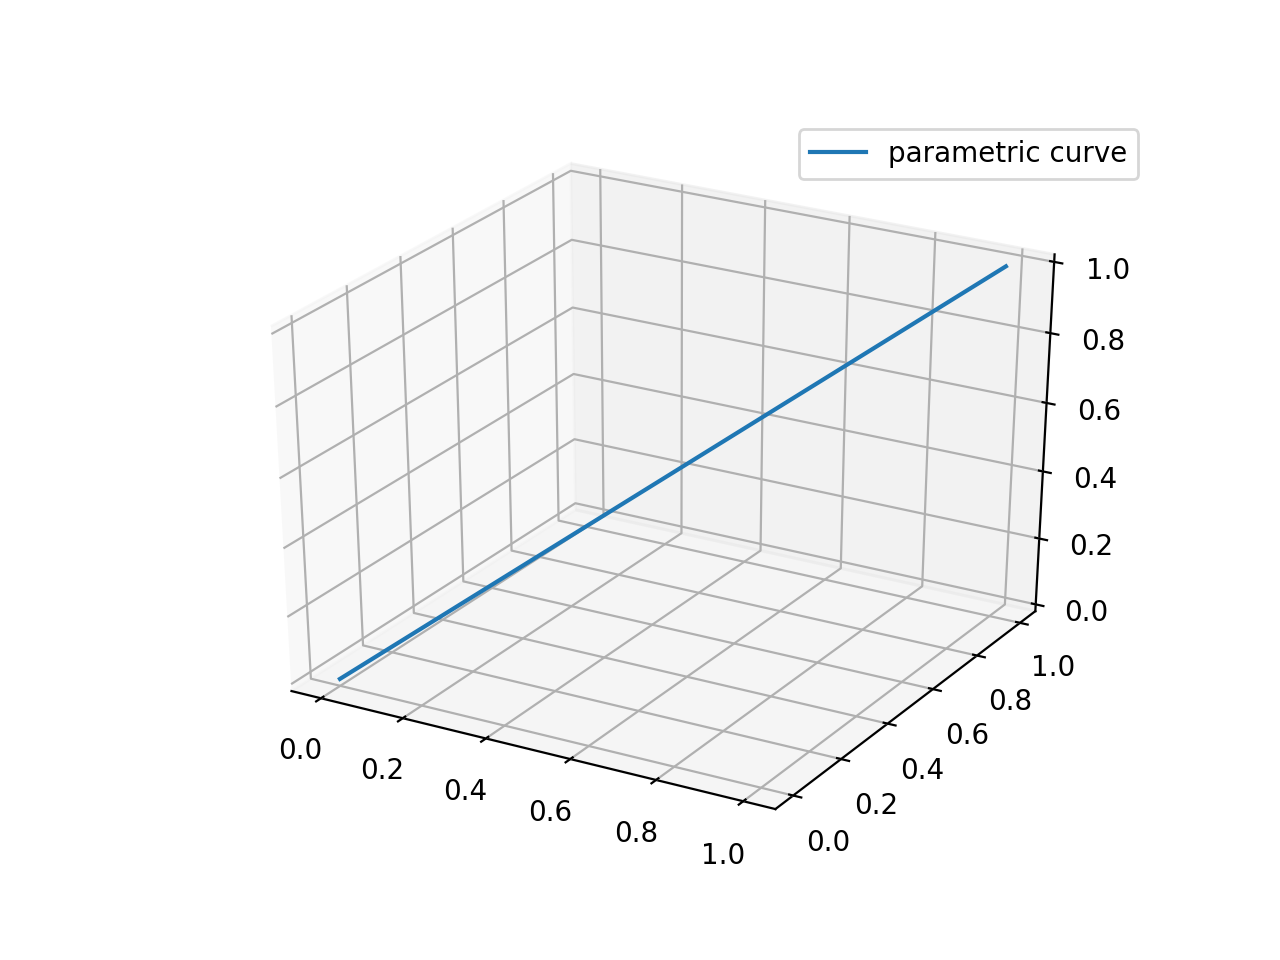

In [3]:
def straightLine(start=(0,0,0), end=(1,1,1)):
    t = np.linspace(0, 1, 100)
    x = start[0] + (end[0] - start[0])*t
    y = start[1] + (end[1] - start[1])*t
    z = start[2] + (end[2] - start[2])*t
    return x, y, z
drawPath(straightLine())

A circle in the x-y plane

<IPython.core.display.Javascript object>


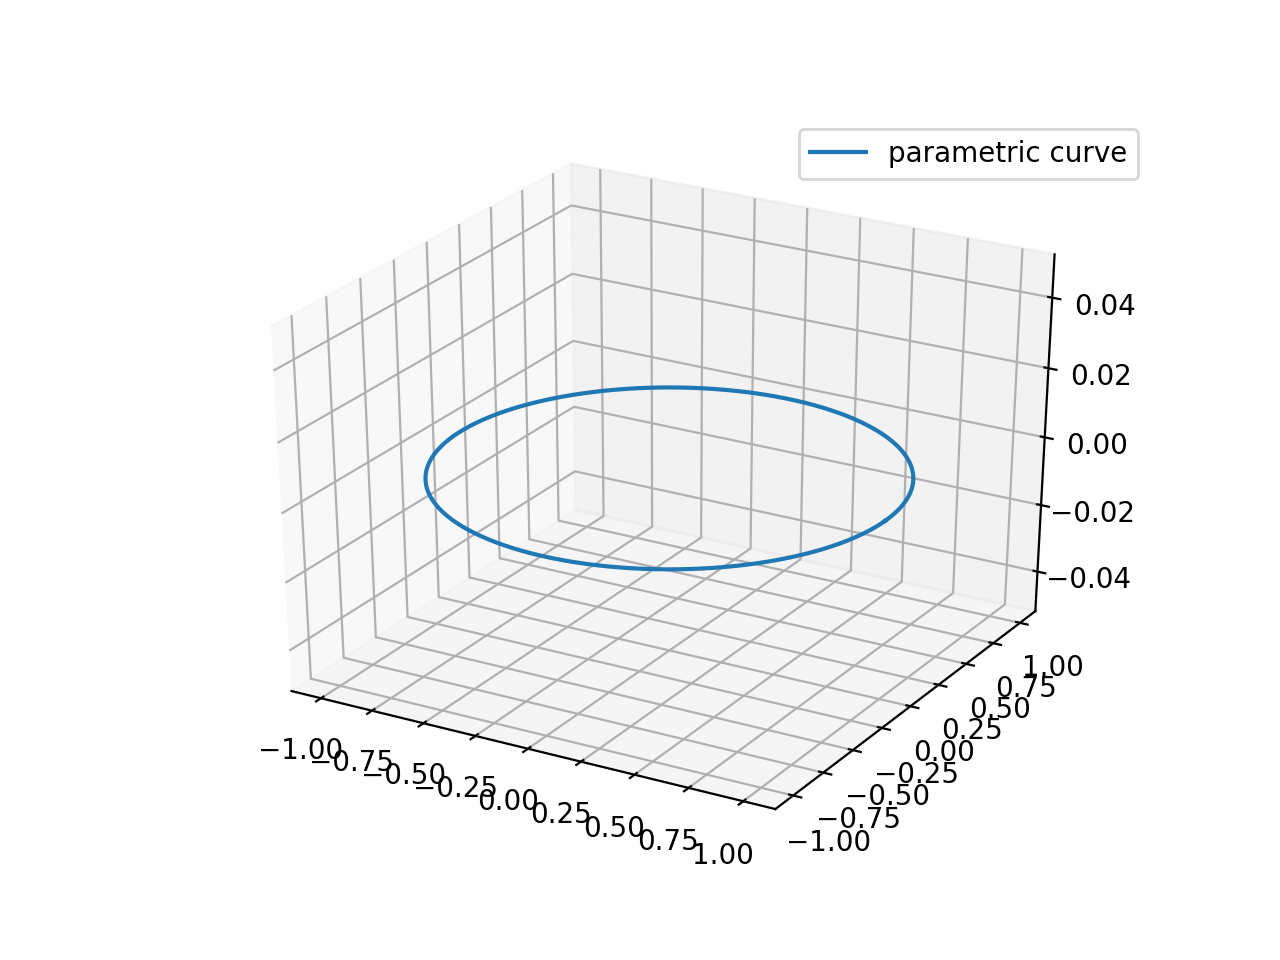

In [22]:
def circleXY(radius=1, offset=(0,0,0)):
    phi = np.linspace(0, 2*np.pi, 400)
    x = radius * np.cos(phi) + offset[0]
    y = radius * np.sin(phi) + offset[1]
    z = np.zeros(len(phi)) + offset[2]
    return x, y, z
drawPath(circleXY())

Same circle, now centred at 2,2,2:

<IPython.core.display.Javascript object>


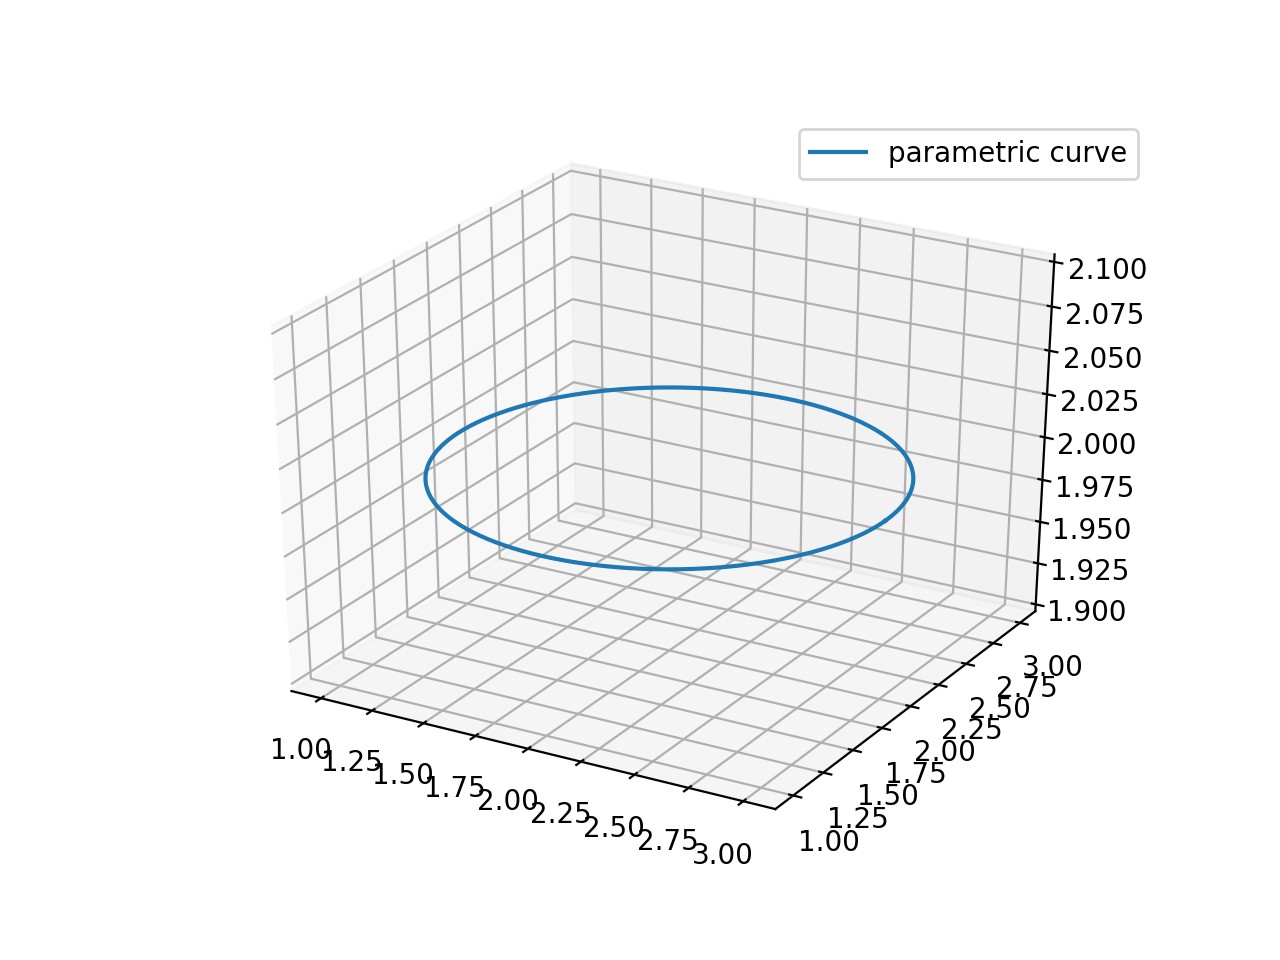

In [23]:
drawPath(circleXY(offset=(2,2,2)))

Below: Ellipse in x-z plane

<IPython.core.display.Javascript object>


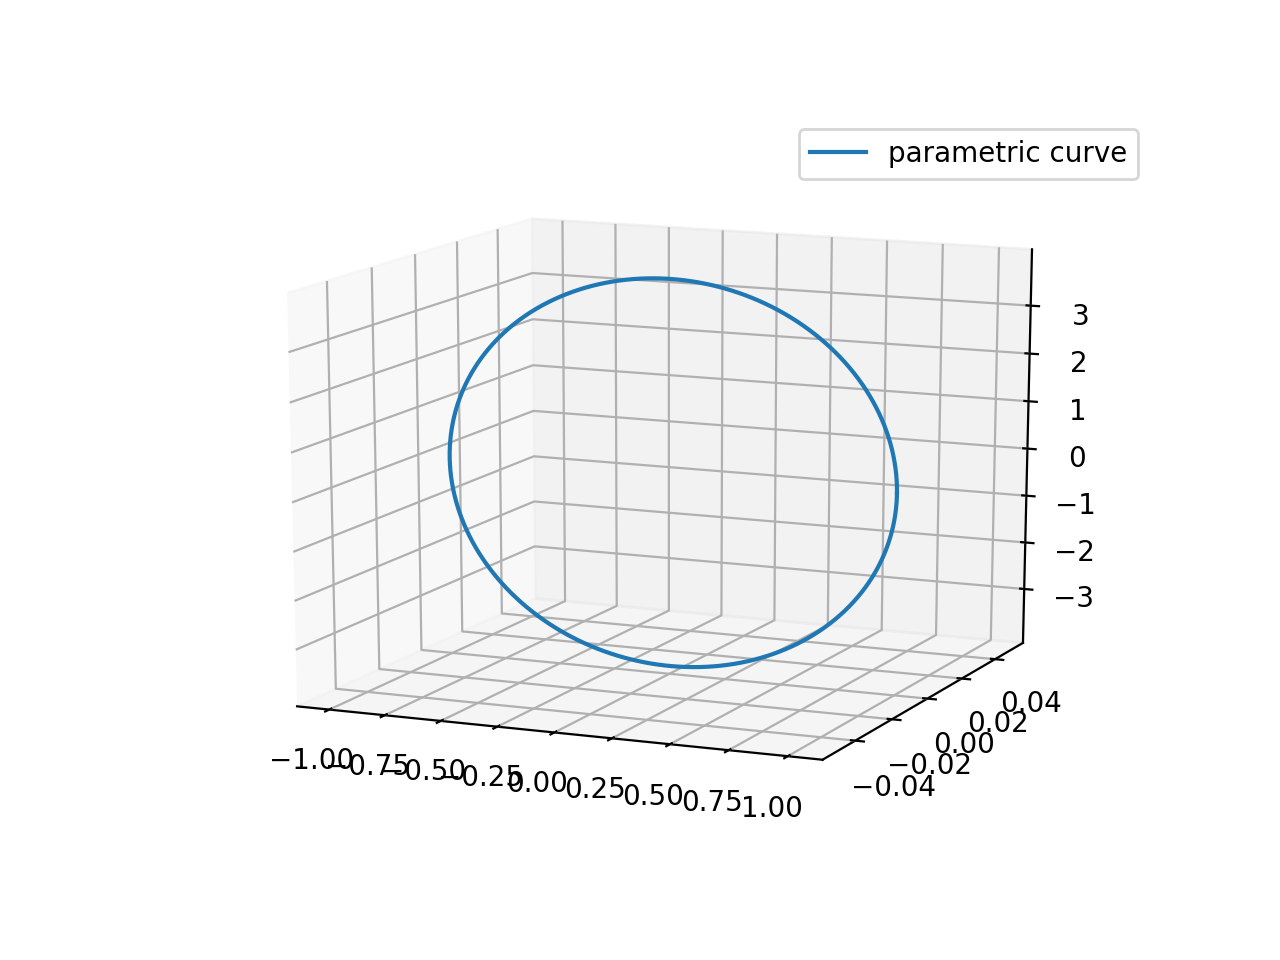

In [26]:
def ellipseXZ(a=1, b=4, offset=(0,0,0)):
    phi = np.linspace(0, 2*np.pi, 400)
    x = a * np.cos(phi) + offset[0]
    y = np.zeros(len(phi)) + offset[1]
    z = b * np.sin(phi) + offset[2]
    return x, y, z
drawPath(ellipseXZ())

A screw (turning in a circle while going upwards along z):

<IPython.core.display.Javascript object>


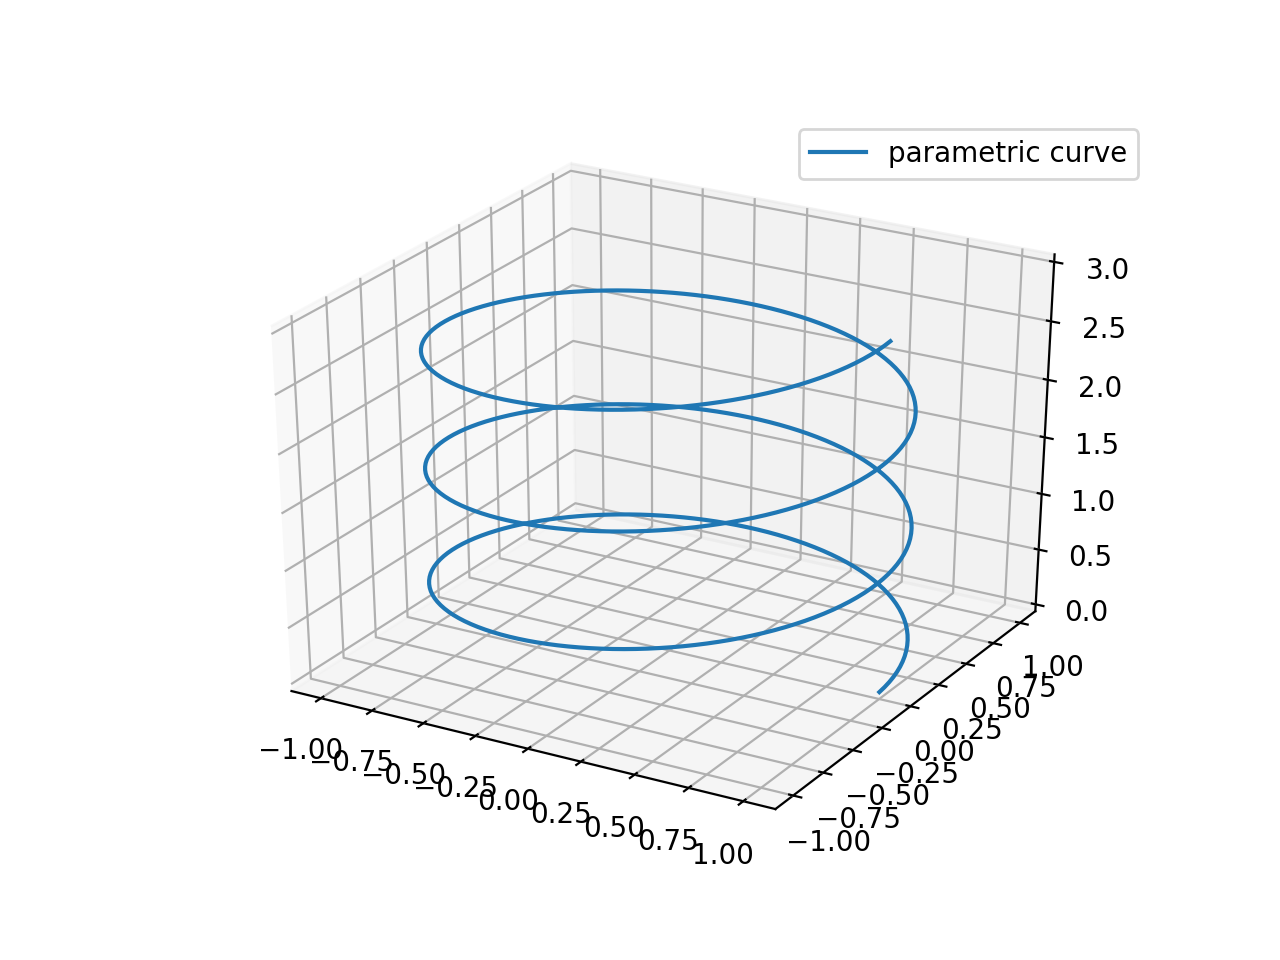

In [6]:
def screw(numturns=3, r=1, minz=0):
    phi = np.linspace(0, 2* numturns * np.pi, 400)
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    z = phi/(2*np.pi) + minz # at each turn, z increases by 1
    return x, y, z
drawPath(screw())

Similar thing, but with variable radius:

<IPython.core.display.Javascript object>


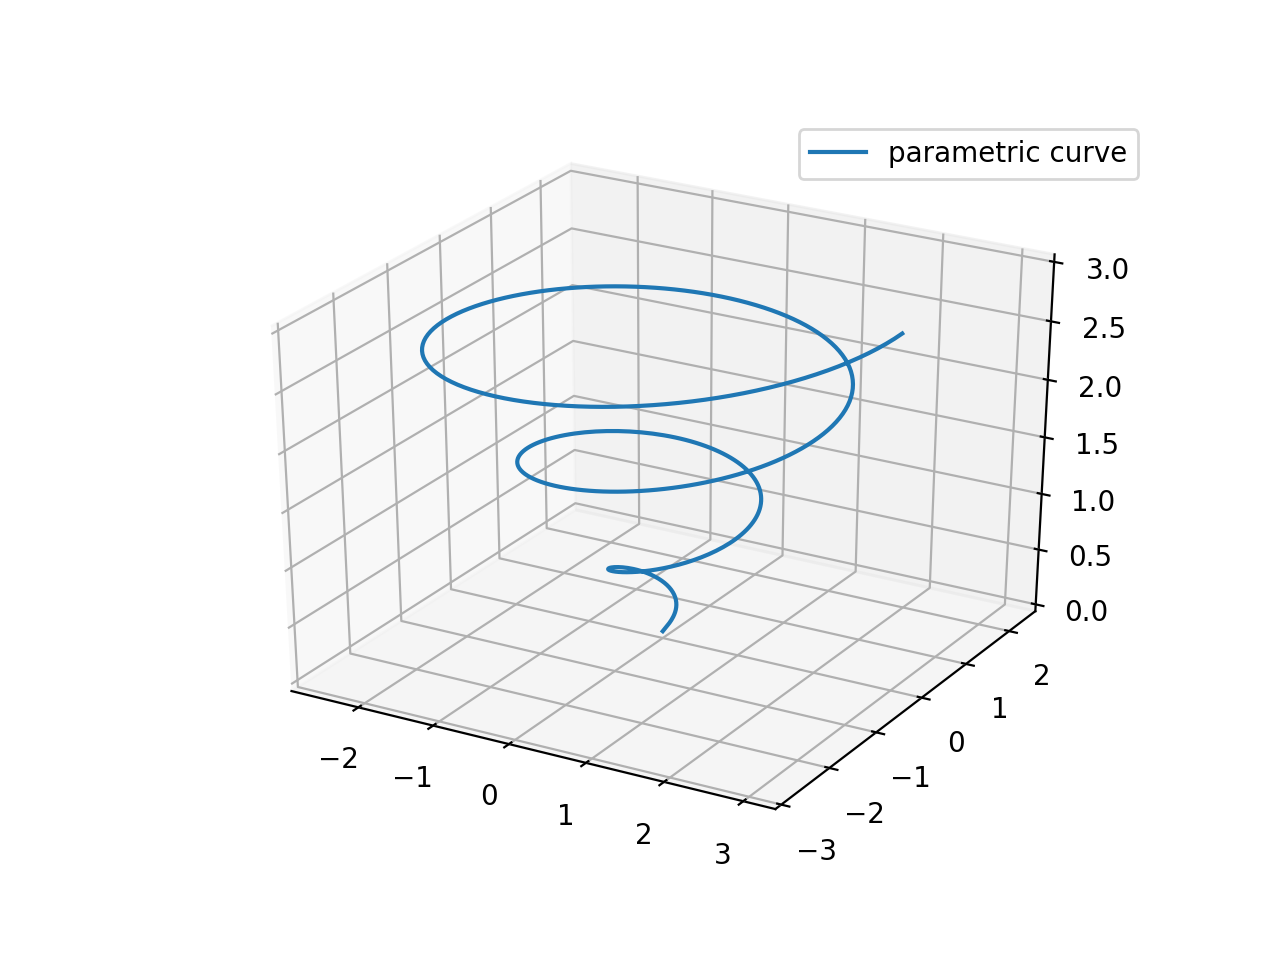

In [7]:
def screwedScrew(numturns=3, r=1, minz=0):
    phi = np.linspace(0, 2* numturns * np.pi, 400)
    x = r*phi/(2*np.pi) * np.cos(phi)
    y = r*phi/(2*np.pi) * np.sin(phi)
    z = phi/(2*np.pi) + minz # at each turn, z increases by 1
    return x, y, z
drawPath(screwedScrew())

parabola in x-z plane

<IPython.core.display.Javascript object>


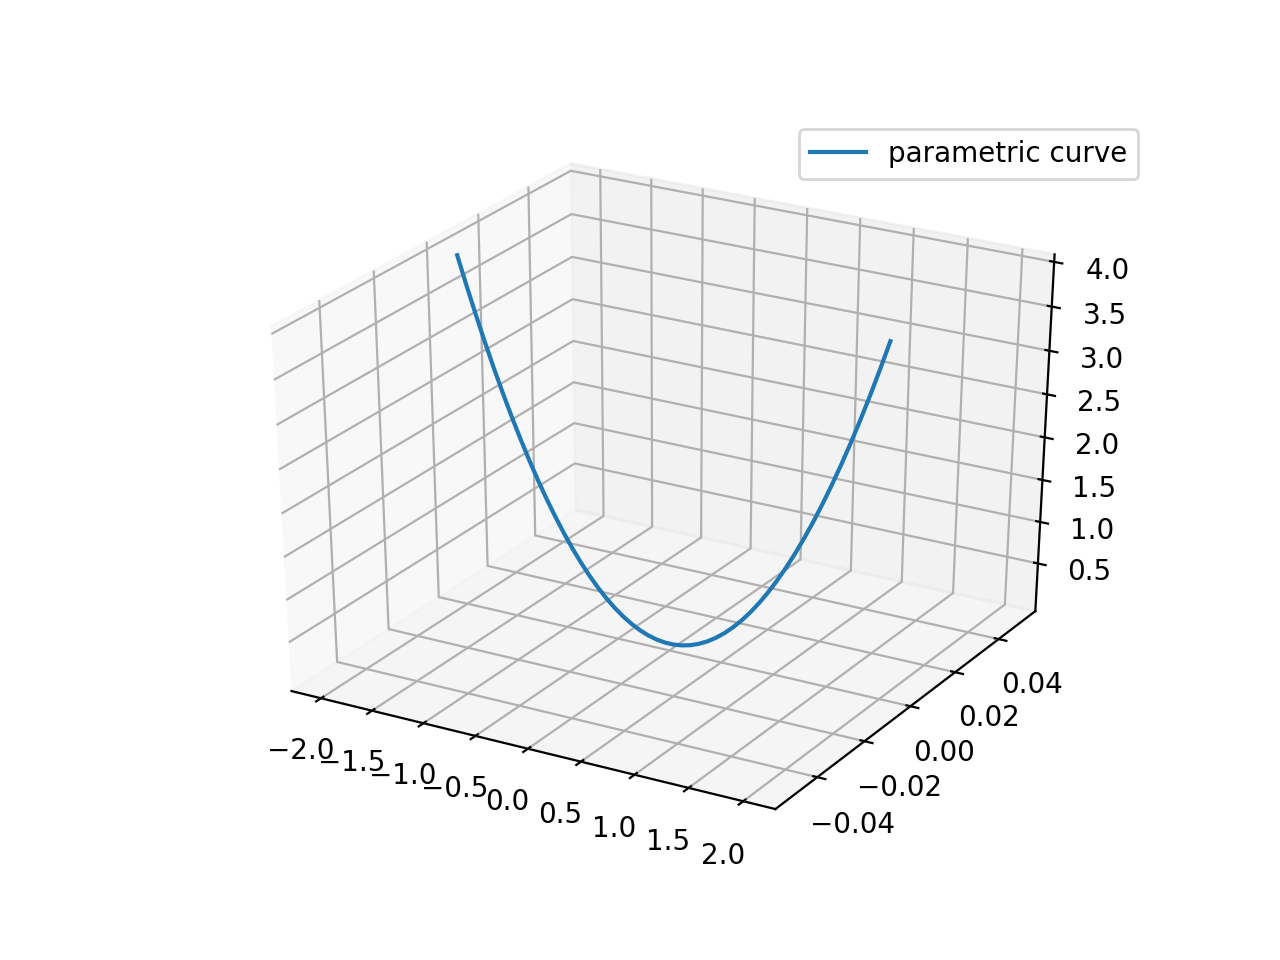

In [8]:
def parabolaXZ():
    t = np.linspace(-2, 2)
    x = t
    y = np.zeros(len(t))
    z = t**2
    return x, y, z
drawPath(parabolaXZ())

Below: path around a square in the y-z plane with corners (0,0,0), (0,0,1), (0,1,1), (0,1,0):

<IPython.core.display.Javascript object>


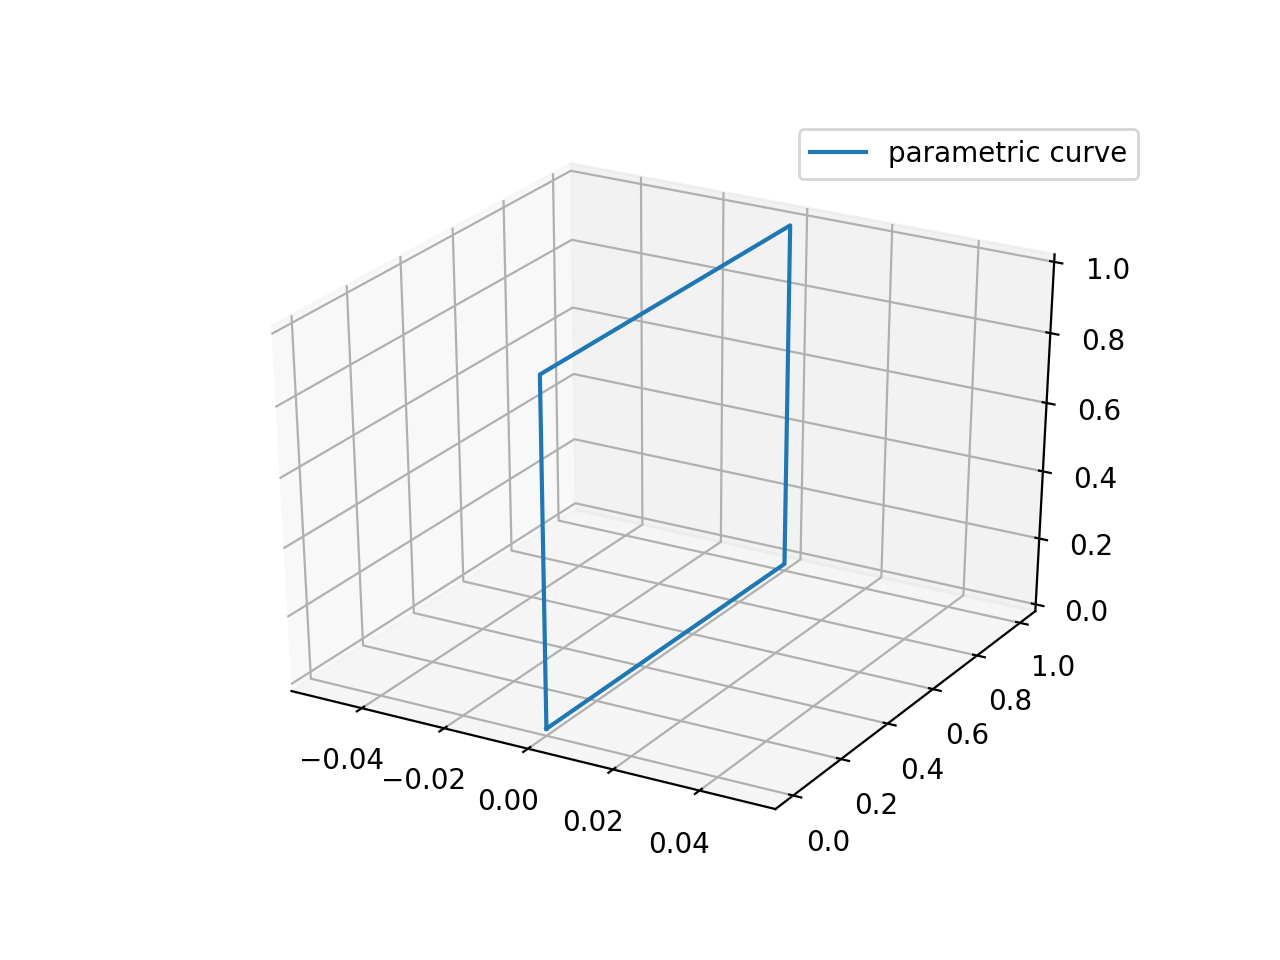

In [13]:
def multiline(xyzList):
    x, y, z = np.array([]), np.array([]), np.array([])
    for xyz in xyzList:
        x=np.append(x,xyz[0])
        y=np.append(y,xyz[1])
        z=np.append(z,xyz[2])
    return x, y, z
drawPath( multiline( (straightLine((0,0,0),(0,0,1)) 
                      , straightLine((0,0,1),(0,1,1))
                      , straightLine((0,1,1),(0,1,0)) 
                      , straightLine((0,1,0),(0,0,0)) 
                     )))

Line from 000 to 111, moving parallel to coordinate axes:

<IPython.core.display.Javascript object>


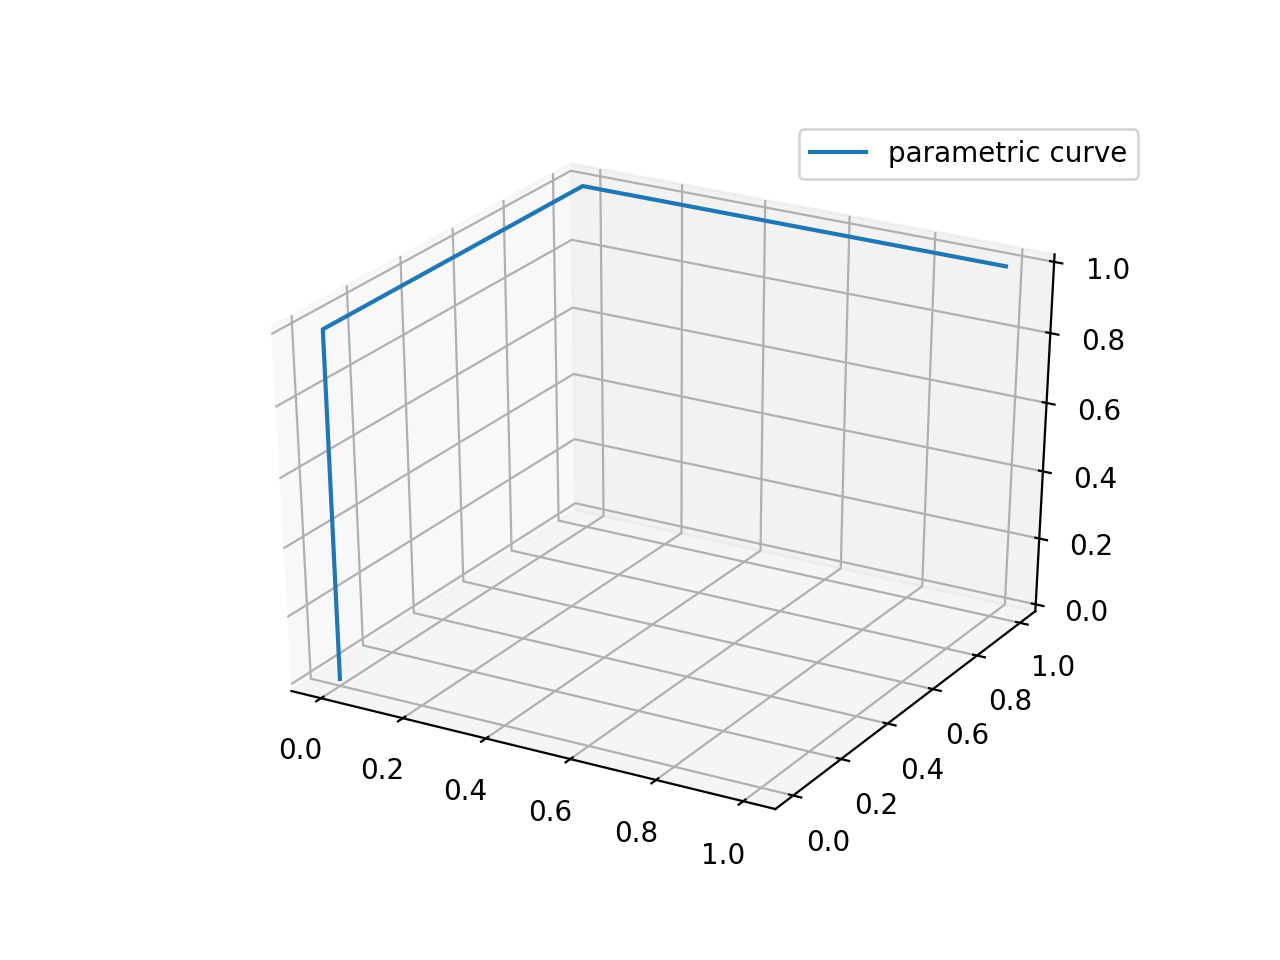

In [14]:
drawPath( multiline( (straightLine((0,0,0),(0,0,1)) 
                      , straightLine((0,0,1),(0,1,1))
                      , straightLine((0,1,1),(1,1,1)) 
                     )))

Below: Throwing something from a clif edge at 0,0,10 with initial velocity 1,1,1, and g= -10

<IPython.core.display.Javascript object>


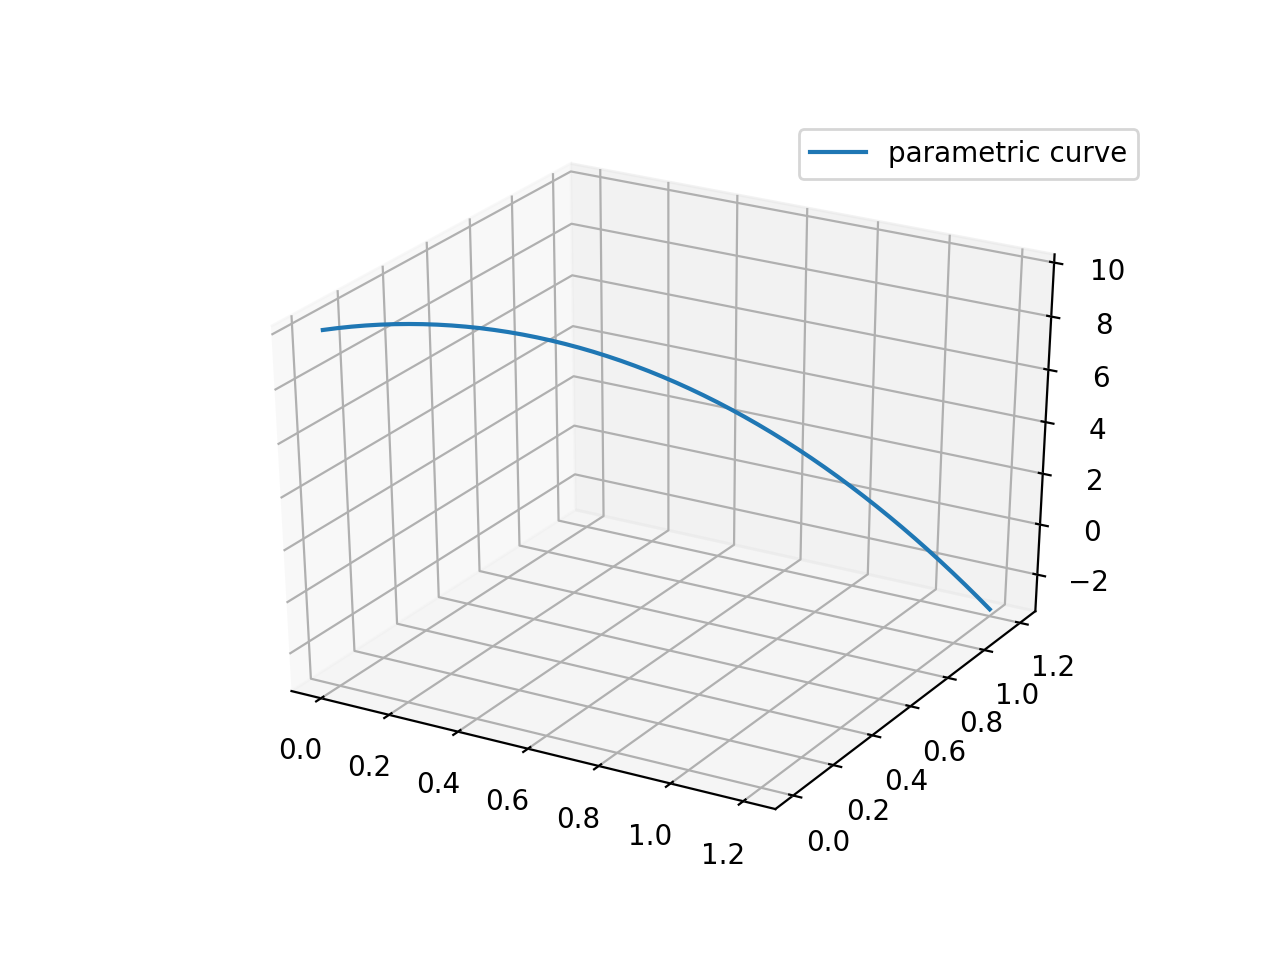

In [20]:
def throw():
    x0, y0, z0 = 0,0,10
    g = -10
    t = np.linspace(0, 1.2)
    x = t + x0
    y = t + y0
    z = t + g*t**2 + z0
    return x, y, z
drawPath(throw())